In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Loan%20Approval%20Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df1 = df.drop(columns = 'Loan_ID')
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df1.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
num_columns = df1.select_dtypes(include = 'number').columns
print(num_columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [ ]:
non_num_columns = df1.select_dtypes(exclude = 'number').columns
print(non_num_columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
df1[non_num_columns].isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
Property_Area,0
Loan_Status,0


In [ ]:
df1.shape

(614, 12)

In [ ]:
print(df1['Gender'].unique())
print(df1['Married'].unique())
print(df1['Dependents'].unique())
print(df1['Self_Employed'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]


In [ ]:
df1['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [ ]:
print(df1['Gender'].mode()[0])
print(df1['Married'].mode()[0])
print(df1['Dependents'].mode()[0])
print(df1['Self_Employed'].mode()[0])

Male
Yes
0
No


In [ ]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])

In [ ]:
df1[num_columns].isna().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [ ]:
print(df1['LoanAmount'].agg(['mean' , 'median']))
print(df1['Loan_Amount_Term'].agg(['mean' , 'median']))
print(df1['Credit_History'].agg(['mean' , 'median']))

mean      146.412162
median    128.000000
Name: LoanAmount, dtype: float64
mean      342.0
median    360.0
Name: Loan_Amount_Term, dtype: float64
mean      0.842199
median    1.000000
Name: Credit_History, dtype: float64


In [ ]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].median())
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['LoanAmount'].median())
df1['Credit_History'] = df1['Credit_History'].fillna(df1['LoanAmount'].median())

In [ ]:
df1.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [ ]:
df1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
df2 = df1.copy()

In [ ]:
income = df2['ApplicantIncome'] + df2['CoapplicantIncome']

In [ ]:
#insert() - a method to insert a data column into the data frame
df2.insert(5, "Income" , income)

In [ ]:
df2.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Income,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,6091.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
df2 = df2.drop(columns = ['ApplicantIncome', 	'CoapplicantIncome'])
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,6091.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,4941.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,141.0,360.0,1.0,Urban,Y


In [ ]:
non_num_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
for col in non_num_columns:
  print(df2[col].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [ ]:
df2['Gender'] = df2['Gender'].map({'Male':0, 'Female':1})
df2['Married'] = df2['Married'].map({"No":0, "Yes":1})
df2['Dependents'] = df2['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})
df2['Education'] = df2['Education'].map({'Not Graduate':0 , 'Graduate':1})
df2['Self_Employed'] = df2['Self_Employed'].map({"No":0 , "Yes":1})
df2['Property_Area'] = df2['Property_Area'].map({'Rural':0, 'Semiurban':1, 'Urban':2})
df2['Loan_Status'] = df2['Loan_Status'].map({"N":0 , "Y":1})

In [ ]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849.0,128.0,360.0,1.0,2,1
1,0,1,1,1,0,6091.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,4941.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000.0,141.0,360.0,1.0,2,1


In [ ]:
X = df2.drop(columns = 'Loan_Status')
y = df2['Loan_Status']

In [ ]:
y.value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
from imblearn.over_sampling import SMOTE
ros = SMOTE()

Xr,yr = ros.fit_resample(X,y)

In [ ]:
yr.value_counts()

,count
Loan_Status,
1,422
0,422


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xr,yr)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelA = DecisionTreeClassifier(criterion = 'entropy' , max_depth=3 , class_weight = {0:2 , 1:1} , max_leaf_nodes=8)

modelA.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight={0: 2, 1: 1}, criterion='entropy',
                       max_depth=3, max_leaf_nodes=8)

In [ ]:
print(modelA.score(xtrain,ytrain))
print(modelA.score(xtest,ytest))

0.7488151658767772
0.7156398104265402


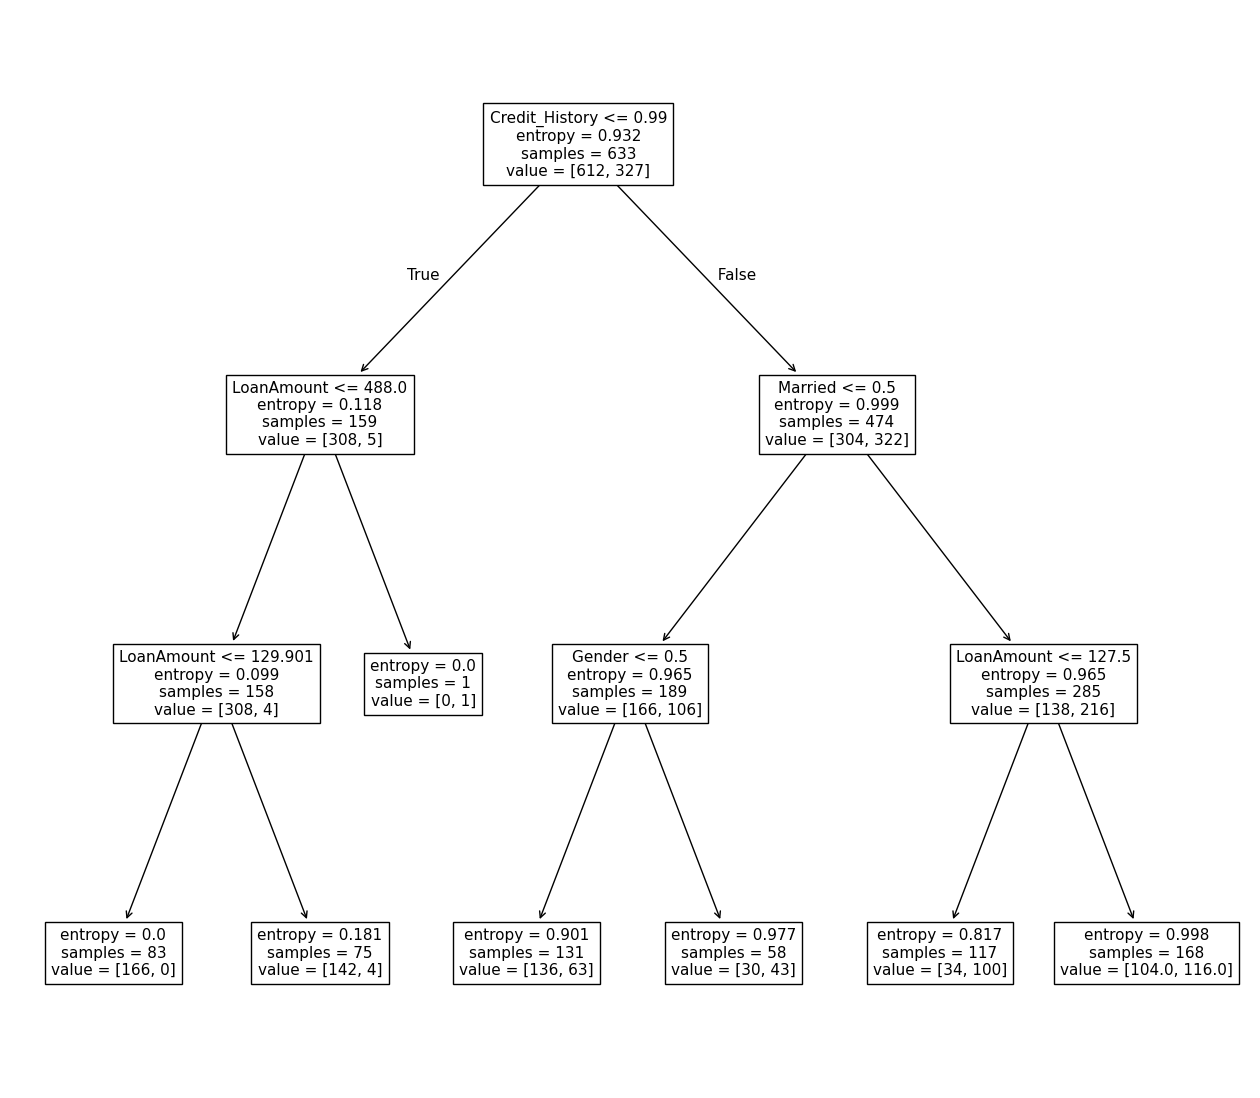

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (16,14))

plot_tree(modelA, feature_names=X.columns)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain , modelA.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       306
           1       0.76      0.80      0.77       327

    accuracy                           0.76       633
   macro avg       0.76      0.76      0.76       633
weighted avg       0.76      0.76      0.76       633



In [ ]:
print(classification_report(ytest , modelA.predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       116
           1       0.75      0.79      0.77        95

    accuracy                           0.79       211
   macro avg       0.78      0.79      0.79       211
weighted avg       0.79      0.79      0.79       211



**Cross validation**

In [ ]:
#5 - fold cross validation - split data for 5 times and evaluate its performance

from sklearn.model_selection import cross_val_score
modelB = DecisionTreeClassifier(criterion = 'entropy' , max_depth=3 , class_weight = {0:2 , 1:1} , max_leaf_nodes=8)
scores = cross_val_score(modelB, X, y, cv=10)
print(scores)
print()
print("Average scores" , scores.mean())

[0.79032258 0.80645161 0.70967742 0.74193548 0.78688525 0.78688525
 0.83606557 0.85245902 0.78688525 0.83606557]

Average scores 0.7933632998413538


**Grid Seach CV**

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [2,4,6,7],
    "min_samples_leaf" : [2,5,7,10],
    "max_leaf_nodes" : [3,5,6,7]
}

modelC = DecisionTreeClassifier()

gridmodel = GridSearchCV(modelC, params)

gridmodel.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 7],
                         'max_leaf_nodes': [3, 5, 6, 7],
                         'min_samples_leaf': [2, 5, 7, 10],
                         'splitter': ['best', 'random']})

In [ ]:
gridmodel.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [ ]:
gridmodel.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=3,
                       min_samples_leaf=2)

In [ ]:
model_after_grid = DecisionTreeClassifier(criterion = 'entropy' , max_depth=2 ,
                                          class_weight = {0:2 , 1:1} , max_leaf_nodes=3,
                                          min_samples_leaf=2)

model_after_grid.fit(xtrain,ytrain)

print(model_after_grid.score(xtrain,ytrain))
print(model_after_grid.score(xtest,ytest))

0.7361769352290679
0.7251184834123223


In [ ]:
print(classification_report(ytrain , model_after_grid.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75       319
           1       0.77      0.67      0.71       314

    accuracy                           0.74       633
   macro avg       0.74      0.74      0.73       633
weighted avg       0.74      0.74      0.73       633



In [ ]:
print(classification_report(ytest , model_after_grid.predict(xtest)))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       103
           1       0.75      0.69      0.72       108

    accuracy                           0.73       211
   macro avg       0.73      0.73      0.73       211
weighted avg       0.73      0.73      0.72       211



**Predictions**

In [ ]:
print(model_after_grid.predict([xtest.values[10]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_r = RandomForestClassifier(n_estimators=100 , criterion = 'gini' , max_depth=5,
                                 class_weight = {0 : 1.75 , 1 : 1})

model_r.fit(xtrain,ytrain)

RandomForestClassifier(class_weight={0: 1.75, 1: 1}, max_depth=5)

In [ ]:
print(model_r.score(xtrain,ytrain))

0.8499210110584519


In [ ]:
print(model_r.score(xtest,ytest))

0.7772511848341233


In [ ]:
print(classification_report(ytrain , model_r.predict(xtrain)))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       319
           1       0.87      0.82      0.85       314

    accuracy                           0.85       633
   macro avg       0.85      0.85      0.85       633
weighted avg       0.85      0.85      0.85       633



In [ ]:
print(classification_report(ytest , model_r.predict(xtest)))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       103
           1       0.78      0.79      0.78       108

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211



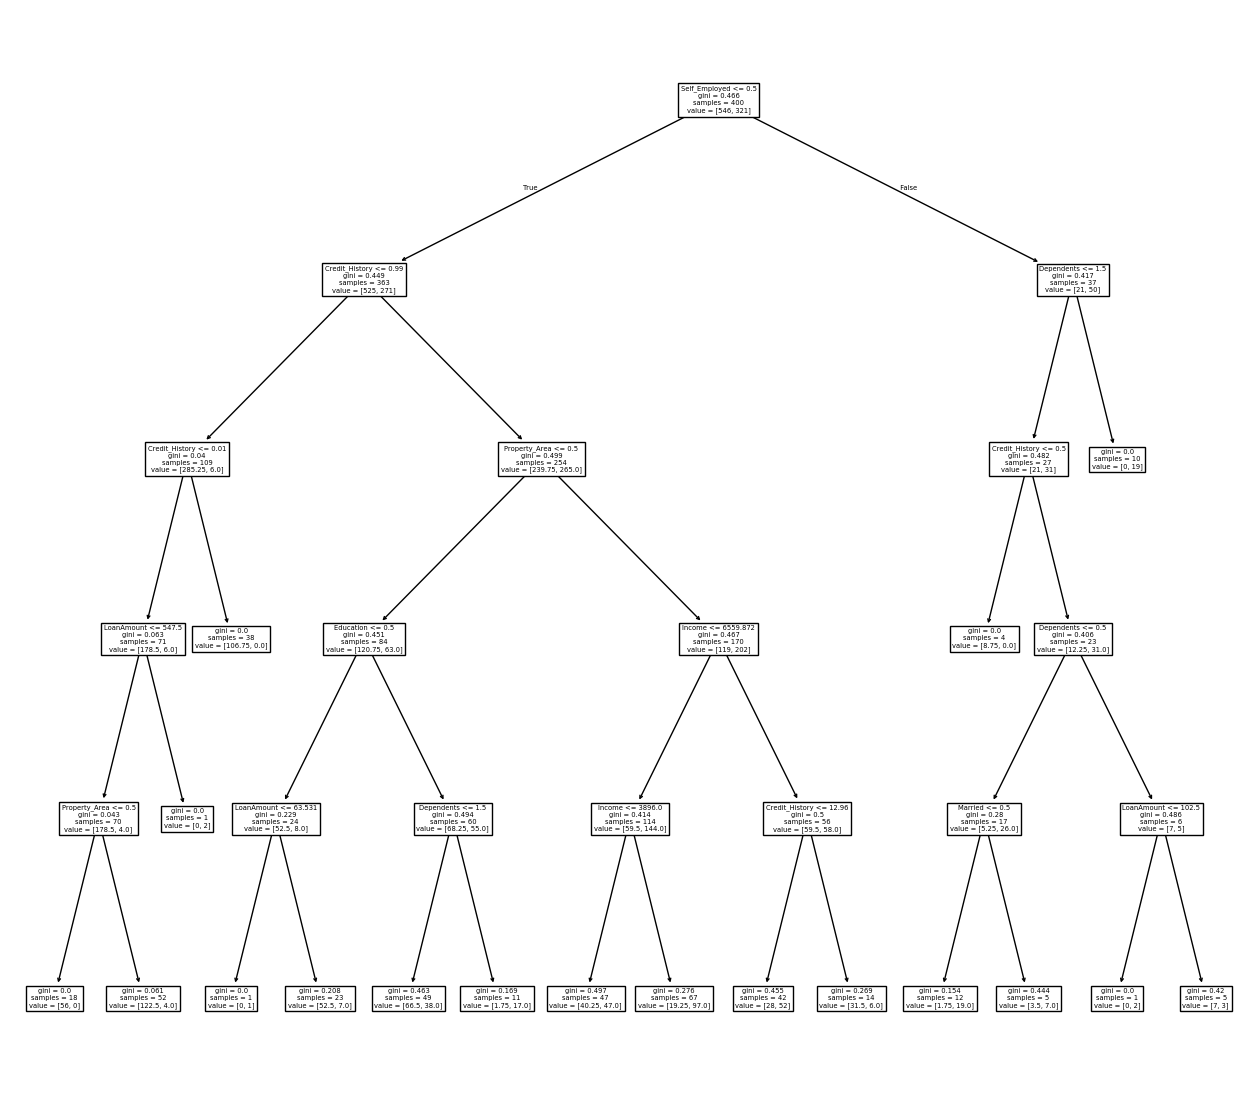

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (16,14))

plot_tree(model_r[99], feature_names=X.columns)

plt.show()

**Predictions**- 10th sample in test data

In [ ]:
print(model_r.predict([xtest.values[10]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
all_predictions = []
for i in range(0,100):
  all_predictions.append(model_r[i].predict([xtest.values[10]]))

In [ ]:
pd.Series(all_predictions).value_counts()

,count
[0.0],96
[1.0],4
